<Axes: xlabel='Temperature (K)', ylabel='Pressure (hPa)'>

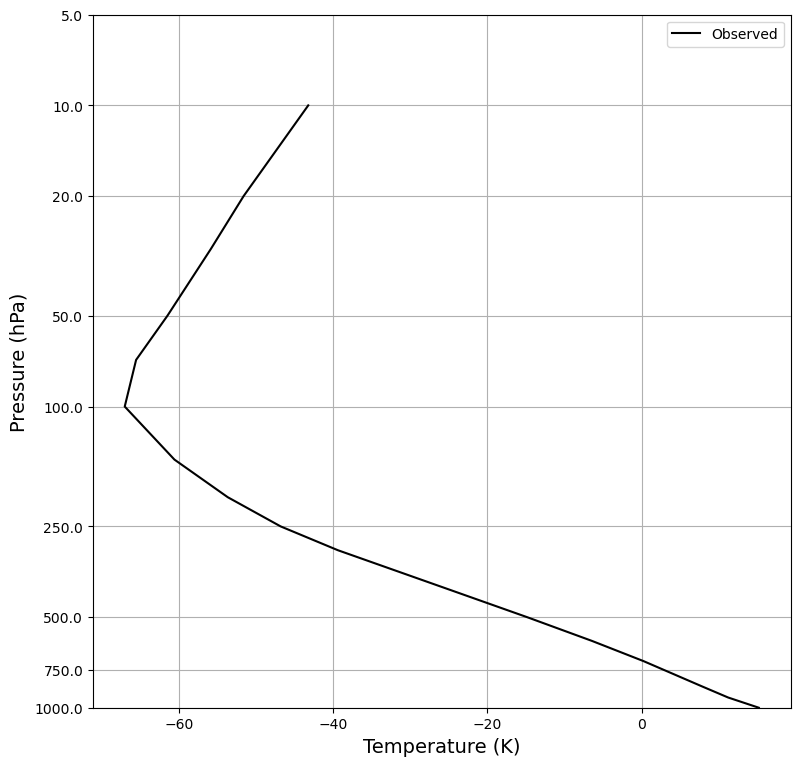

In [1]:
#  This code is used just to create the skew-T plot of global, annual mean air temperature
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import climlab
from metpy.plots import SkewT

#plt.style.use('dark_background')

ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_air = xr.open_dataset( ncep_url + "pressure/air.mon.1981-2010.ltm.nc", use_cftime=True)
#  Take global, annual average 
coslat = np.cos(np.deg2rad(ncep_air.lat))
weight = coslat / coslat.mean(dim='lat')
Tglobal = (ncep_air.air * weight).mean(dim=('lat','lon','time'))

def zstar(lev):
    return -np.log(lev / climlab.constants.ps)

def plot_soundings(result_list, name_list, plot_obs=True, fixed_range=False):
    color_cycle=['r', 'g', 'b', 'y']
    # col is either a column model object or a list of column model objects
    #if isinstance(state_list, climlab.Process):
    #    # make a list with a single item
    #    collist = [collist]
    fig, ax = plt.subplots(figsize=(9,9))
    if plot_obs:
        ax.plot(Tglobal, zstar(Tglobal.level), color='k', label='Observed')    
    for i, state in enumerate(result_list):
        Tatm = state['Tatm']
        lev = Tatm.domain.axes['lev'].points
        Ts = state['Ts']
        ax.plot(Tatm, zstar(lev), color=color_cycle[i], label=name_list[i])
        ax.plot(Ts, 0, 'o', markersize=12, color=color_cycle[i])
    #ax.invert_yaxis()
    yticks = np.array([1000., 750., 500., 250., 100., 50., 20., 10., 5.])
    ax.set_yticks(-np.log(yticks/1000.))
    ax.set_yticklabels(yticks)
    ax.set_xlabel('Temperature (K)', fontsize=14)
    ax.set_ylabel('Pressure (hPa)', fontsize=14)
    ax.grid()
    ax.legend()
    if fixed_range:
        ax.set_xlim([200, 300])
    ax.set_ylim(zstar(np.array([1000., 5.])))
    #ax2 = ax.twinx()
    
    return ax

plot_soundings([],[] )


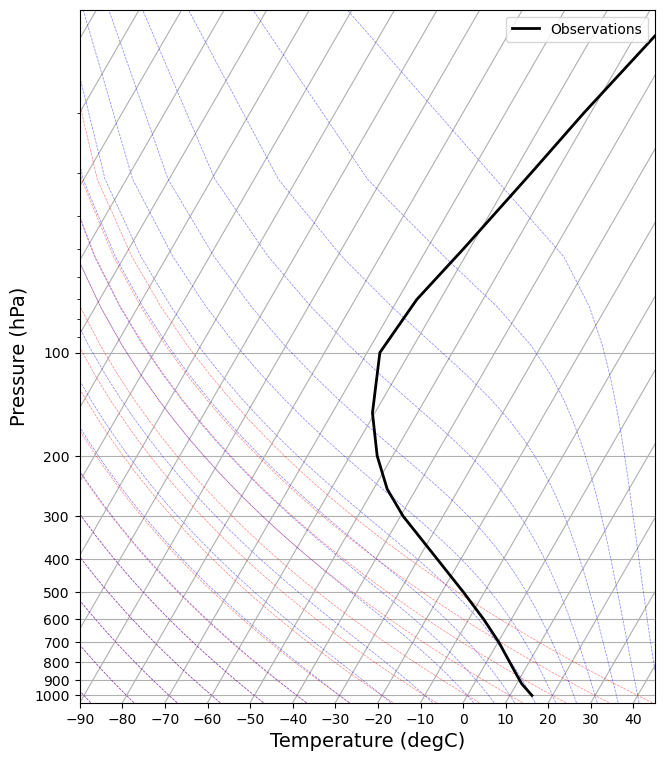

In [2]:
def make_skewT():
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig, rotation=30)
    skew.plot(Tglobal.level, Tglobal, color='k', linestyle='-', linewidth=2, label='Observations')
    skew.ax.set_ylim(1050, 10)
    skew.ax.set_xlim(-90, 45)
    # Add the relevant special lines
    skew.plot_dry_adiabats(linewidth=0.5)
    skew.plot_moist_adiabats(linewidth=0.5)
    #skew.plot_mixing_lines()
    skew.ax.legend()
    skew.ax.set_xlabel('Temperature (degC)', fontsize=14)
    skew.ax.set_ylabel('Pressure (hPa)', fontsize=14)
    return skew


skew = make_skewT()

<xarray.DataArray 'Q' (time: 240, lev: 26, lat: 96, lon: 144)> Size: 345MB
[86261760 values with dtype=float32]
Coordinates:
  * lev      (lev) float64 208B 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * time     (time) object 2kB 0001-02-01 00:00:00 ... 0021-01-01 00:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    mdims:         1
    units:         kg/kg
    long_name:     Specific humidity
    cell_methods:  time: mean
<xarray.DataArray 'gw' (lat: 96)> Size: 768B
[96 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Attributes:
    long_name:  gauss weights


<xarray.DataArray (lev: 26)> Size: 208B
array([2.16104904e-06, 2.15879387e-06, 2.15121262e-06, 2.13630949e-06,
       2.12163684e-06, 2.11168002e-06, 2.09396914e-06, 2.10589390e-06,
       2.42166155e-06, 3.12595653e-06, 5.01369691e-06, 9.60746488e-06,
       2.08907654e-05, 4.78823747e-05, 1.05492451e-04, 2.11889055e-04,
       3.94176751e-04, 7.10734458e-04, 1.34192099e-03, 2.05153261e-03,
       3.16844784e-03, 4.96883408e-03, 6.62218037e-03, 8.38350326e-03,
       9.38620899e-03, 9.65030544e-03])
Coordinates:
  * lev      (lev) float64 208B 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6


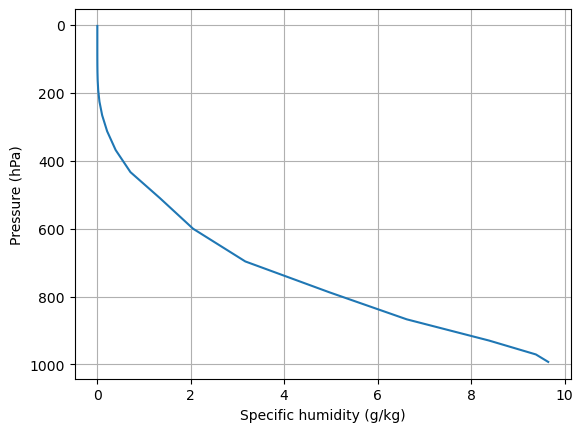

In [3]:
# Load the model output as we have done before
cesm_data_path = "/Users/yuchiaol_ntuas/Desktop/ebooks/local_ncu_climate_modelling/book_test2/docs/data/cpl_1850_f19.cam.h0.nc"
atm_control = xr.open_dataset(cesm_data_path)

# The specific humidity is stored in the variable called Q in this dataset:
print(atm_control.Q)
print(atm_control.gw)


# Take global, annual average of the specific humidity
weight_factor = atm_control.gw / atm_control.gw.mean(dim='lat')

Qglobal = (atm_control.Q * weight_factor).mean(dim=('lat','lon','time'))
# Take a look at what we just calculated ... it should be one-dimensional (vertical levels)
print(Qglobal)

fig, ax = plt.subplots()
#  Multiply Qglobal by 1000 to put in units of grams water vapor per kg of air
ax.plot(Qglobal*1000., Qglobal.lev)
ax.invert_yaxis()
ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('Specific humidity (g/kg)')
ax.grid()


In [4]:
#  Make a model on same vertical domain as the GCM
mystate = climlab.column_state(lev=Qglobal.lev, water_depth=2.5)
print(mystate)

radmodel = climlab.radiation.RRTMG(name='Radiation (all gases)',  # give our model a name!
                              state=mystate,   # give our model an initial condition!
                              specific_humidity=Qglobal.values,  # tell the model how much water vapor there is
                              albedo = 0.25,  # this the SURFACE shortwave albedo
                              timestep = climlab.constants.seconds_per_day,  # set the timestep to one day (measured in seconds)
                             )

print(radmodel)

#  Here's the state dictionary we already created
print('========================================')
print('=======radmodel.state=======')
print(radmodel.state)

#  Here are the pressure levels in hPa
print('========================================')
print('=======radmodel.lev=======')
print(radmodel.lev)

print('========================================')
print('=======radmodel.absorber_vmr=======')
print(radmodel.absorber_vmr)


#  specific humidity in kg/kg, on the same pressure axis
print('========================================')
print('=======radmodel.specific_humidity=======')
print(radmodel.specific_humidity)


AttrDict({'Ts': Field([288.]), 'Tatm': Field([200.  , 203.12, 206.24, 209.36, 212.48, 215.6 , 218.72, 221.84,
       224.96, 228.08, 231.2 , 234.32, 237.44, 240.56, 243.68, 246.8 ,
       249.92, 253.04, 256.16, 259.28, 262.4 , 265.52, 268.64, 271.76,
       274.88, 278.  ])})
climlab Process of type <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>. 
State variables and domain shapes: 
  Ts: (1,) 
  Tatm: (26,) 
The subprocess tree: 
Radiation (all gases): <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>
   SW: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>
   LW: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>

=======radmodel.state=======
AttrDict({'Ts': Field([288.]), 'Tatm': Field([200.  , 203.12, 206.24, 209.36, 212.48, 215.6 , 218.72, 221.84,
       224.96, 228.08, 231.2 , 234.32, 237.44, 240.56, 243.68, 246.8 ,
       249.92, 253.04, 256.16, 259.28, 262.4 , 265.52, 268.64, 271.76,
       274.88, 278.  ])})
=======radmodel.lev=======
[  3.544638    7.3888135  13.967214   23.944625

In [5]:
for item in radmodel.input:
    print(item)

specific_humidity
absorber_vmr
cldfrac
clwp
ciwp
r_liq
r_ice
emissivity
S0
insolation
coszen
eccentricity_factor
aldif
aldir
asdif
asdir
icld
irng
idrv
permuteseed_sw
permuteseed_lw
dyofyr
inflgsw
inflglw
iceflgsw
iceflglw
liqflgsw
liqflglw
tauc_sw
tauc_lw
ssac_sw
asmc_sw
fsfc_sw
tauaer_sw
ssaaer_sw
asmaer_sw
ecaer_sw
tauaer_lw
isolvar
indsolvar
bndsolvar
solcycfrac


In [6]:
print('========================================')
print('=======radmodel.Ts=======')
print(radmodel.Ts)

print('========================================')
print('=======radmodel.Tatm=======')
print(radmodel.Tatm)

# a single step forward
radmodel.step_forward()

print('========================================')
print('=======radmodel.Ts=======')
print(radmodel.Ts)

climlab.to_xarray(radmodel.diagnostics)

climlab.to_xarray(radmodel.LW_flux_up)

print('========================================')
print('=======radmodel.ASR - radmodel.OLR=======')
print(radmodel.ASR - radmodel.OLR)


=======radmodel.Ts=======
[288.]
=======radmodel.Tatm=======
[200.   203.12 206.24 209.36 212.48 215.6  218.72 221.84 224.96 228.08
 231.2  234.32 237.44 240.56 243.68 246.8  249.92 253.04 256.16 259.28
 262.4  265.52 268.64 271.76 274.88 278.  ]
=======radmodel.Ts=======
[288.57727148]
=======radmodel.ASR - radmodel.OLR=======
[3.76767763]


=======radmodel.ASR - radmodel.OLR=======
[0.00988074]


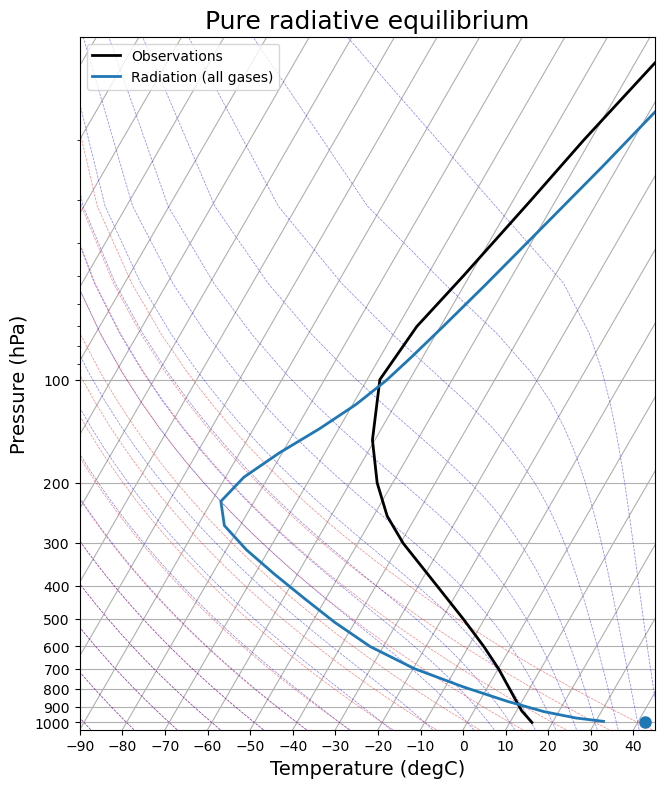

In [7]:
while np.abs(radmodel.ASR - radmodel.OLR) > 0.01:
    radmodel.step_forward()

#  Check the energy budget again
print('========================================')
print('=======radmodel.ASR - radmodel.OLR=======')
print(radmodel.ASR - radmodel.OLR)

def add_profile(skew, model, linestyle='-', color=None):
    line = skew.plot(model.lev, model.Tatm - climlab.constants.tempCtoK,
             label=model.name, linewidth=2)[0]
    skew.plot(1000, model.Ts - climlab.constants.tempCtoK, 'o', 
              markersize=8, color=line.get_color())
    skew.ax.legend()

skew = make_skewT()
add_profile(skew, radmodel)
skew.ax.set_title('Pure radiative equilibrium', fontsize=18);


=======radmodel_noH2O=======
climlab Process of type <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>. 
State variables and domain shapes: 
  Ts: (1,) 
  Tatm: (26,) 
The subprocess tree: 
Radiation (no H2O): <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>
   SW: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>
   LW: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>

=======radmodel_noH2O.specific_humidity=======
[2.16104904e-06 2.15879387e-06 2.15121262e-06 2.13630949e-06
 2.12163684e-06 2.11168002e-06 2.09396914e-06 2.10589390e-06
 2.42166155e-06 3.12595653e-06 5.01369691e-06 9.60746488e-06
 2.08907654e-05 4.78823747e-05 1.05492451e-04 2.11889055e-04
 3.94176751e-04 7.10734458e-04 1.34192099e-03 2.05153261e-03
 3.16844784e-03 4.96883408e-03 6.62218037e-03 8.38350326e-03
 9.38620899e-03 9.65030544e-03]
=======radmodel_noH2O.specific_humidity=======
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


=======radmodel_noH2O.ASR - radmodel_noH2O.OLR=======
[-0.00999903]


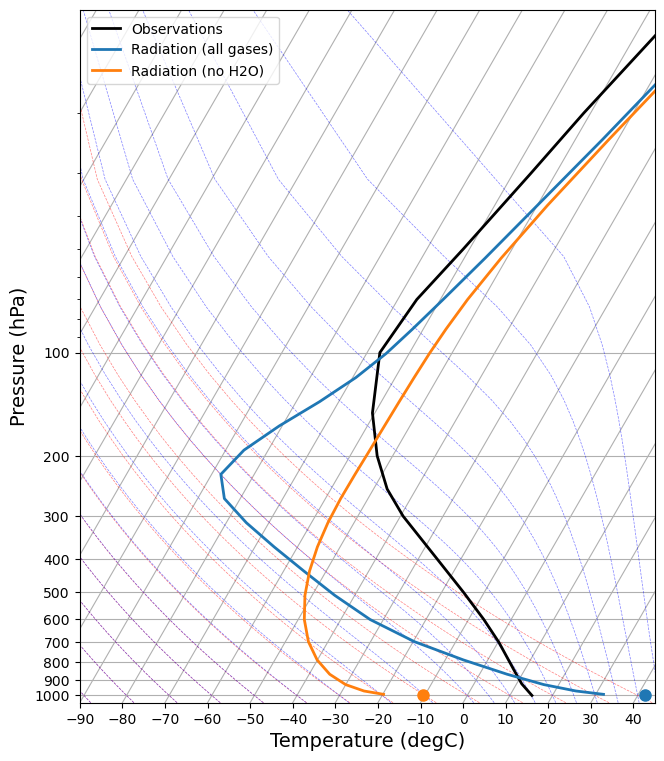

In [8]:
# Make an exact clone of our existing model
radmodel_noH2O = climlab.process_like(radmodel)
radmodel_noH2O.name = 'Radiation (no H2O)'

print('========================================')
print('=======radmodel_noH2O=======')
print(radmodel_noH2O)

#  Here is the water vapor profile we started with
print('========================================')
print('=======radmodel_noH2O.specific_humidity=======')
print(radmodel_noH2O.specific_humidity)

radmodel_noH2O.specific_humidity *= 0.

print('========================================')
print('=======radmodel_noH2O.specific_humidity=======')
print(radmodel_noH2O.specific_humidity)

#  it's useful to take a single step first before starting the while loop
#   because the diagnostics won't get updated 
#  (and thus show the effects of removing water vapor)
#  until we take a step forward

radmodel_noH2O.step_forward()
while np.abs(radmodel_noH2O.ASR - radmodel_noH2O.OLR) > 0.01:
    radmodel_noH2O.step_forward()

print('========================================')
print('=======radmodel_noH2O.ASR - radmodel_noH2O.OLR=======')
print(radmodel_noH2O.ASR - radmodel_noH2O.OLR)

skew = make_skewT()
for model in [radmodel, radmodel_noH2O]:
    add_profile(skew, model)
